In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,mean_squared_log_error
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
import xgboost as xgb

In [2]:
Original = pd.read_csv('train_dataset.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
TestData = pd.read_csv('test_dataset.csv')

In [3]:
train.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51


In [4]:
train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)
train.head(10)

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51
5,9.08,4.0,5.0,5.0,3.0,7.26,0.0,1.0,5.0,33858.0,1.0,0.0,1.0,1.0,1.0,142.58
6,4.80,2.0,1.0,0.0,2.0,9.58,0.0,0.0,6.0,27694.0,1.0,1.0,1.0,1.0,1.0,69.47
7,4.29,3.0,2.0,0.0,2.0,16.90,1.0,0.0,2.0,23688.0,1.0,1.0,1.0,1.0,1.0,68.84
8,8.55,3.0,5.0,0.0,2.0,13.80,1.0,0.0,6.0,38382.0,0.0,0.0,0.0,0.0,0.0,87.07
9,3.08,4.0,1.0,0.0,3.0,15.70,1.0,1.0,9.0,27694.0,1.0,1.0,1.0,1.0,1.0,80.29


In [5]:
store = Original[['units_per_case','store_sqft','coffee_bar','video_store','salad_bar','prepared_food','florist']].copy()
store_feat = Original[["coffee_bar",'video_store','salad_bar','prepared_food','florist']].copy()
customer_feat = Original[["total_children","num_children_at_home","avg_cars_at home(approx).1"]].copy()
item_feat = Original[["gross_weight","recyclable_package","low_fat"]].copy()
sales = Original[['store_sales(in millions)','unit_sales(in millions)']].copy()
store = store.drop_duplicates(subset=["store_sqft",'units_per_case'])

In [6]:
sales['store_sales(in millions)']<=0
#checks for negative sales

0        False
1        False
2        False
3        False
4        False
         ...  
51358    False
51359    False
51360    False
51361    False
51362    False
Name: store_sales(in millions), Length: 51363, dtype: bool

In [7]:
Original.isna().sum()* 100 / len(Original)
#checks for Nans

store_sales(in millions)      0.0
unit_sales(in millions)       0.0
total_children                0.0
num_children_at_home          0.0
avg_cars_at home(approx).1    0.0
gross_weight                  0.0
recyclable_package            0.0
low_fat                       0.0
units_per_case                0.0
store_sqft                    0.0
coffee_bar                    0.0
video_store                   0.0
salad_bar                     0.0
prepared_food                 0.0
florist                       0.0
cost                          0.0
dtype: float64

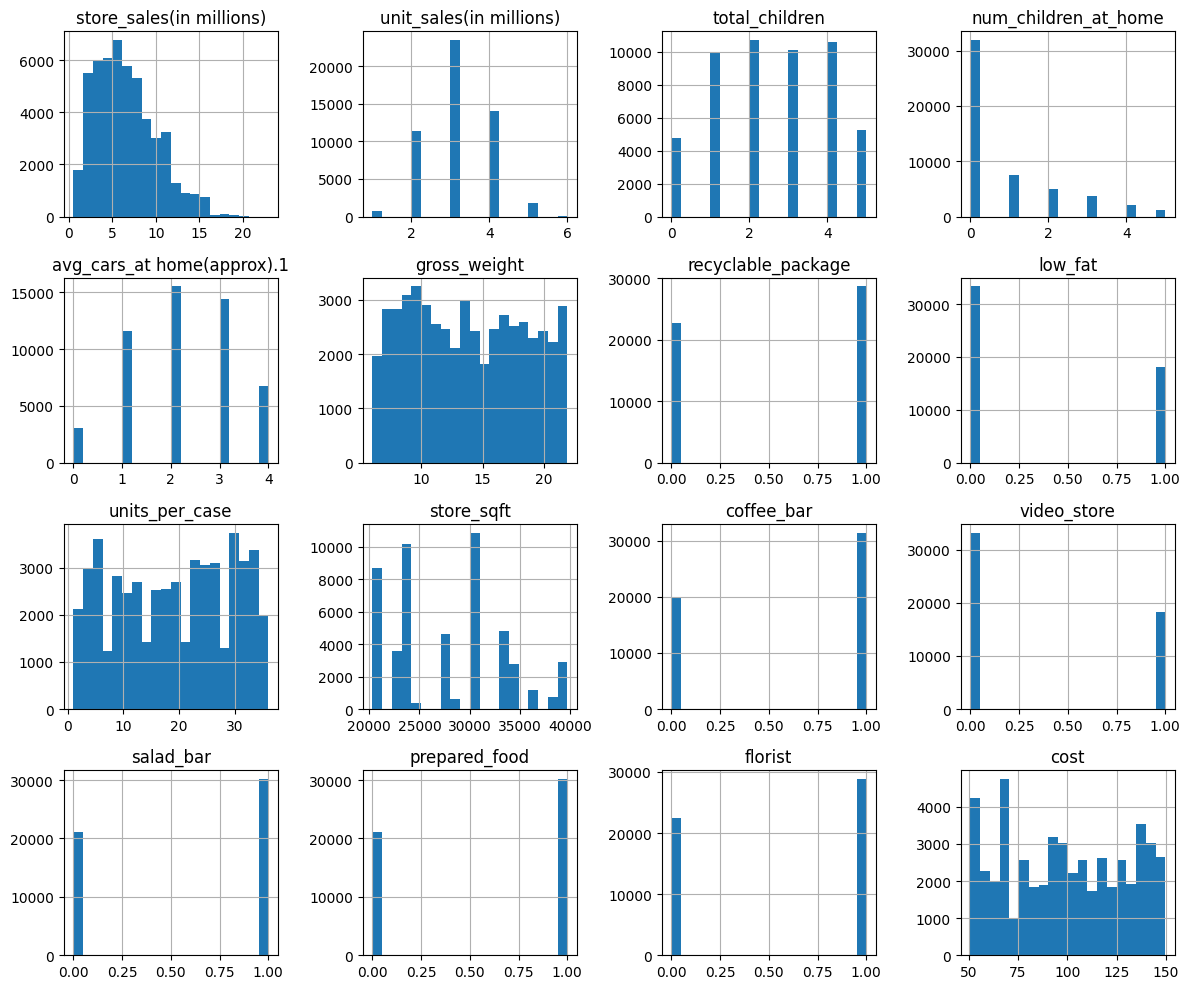

In [8]:
data = Original[['store_sales(in millions)', 'unit_sales(in millions)', 'total_children', 'num_children_at_home', 'avg_cars_at home(approx).1',
              'gross_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft', 'coffee_bar',
              'video_store', 'salad_bar', 'prepared_food', 'florist', 'cost']]

data.hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

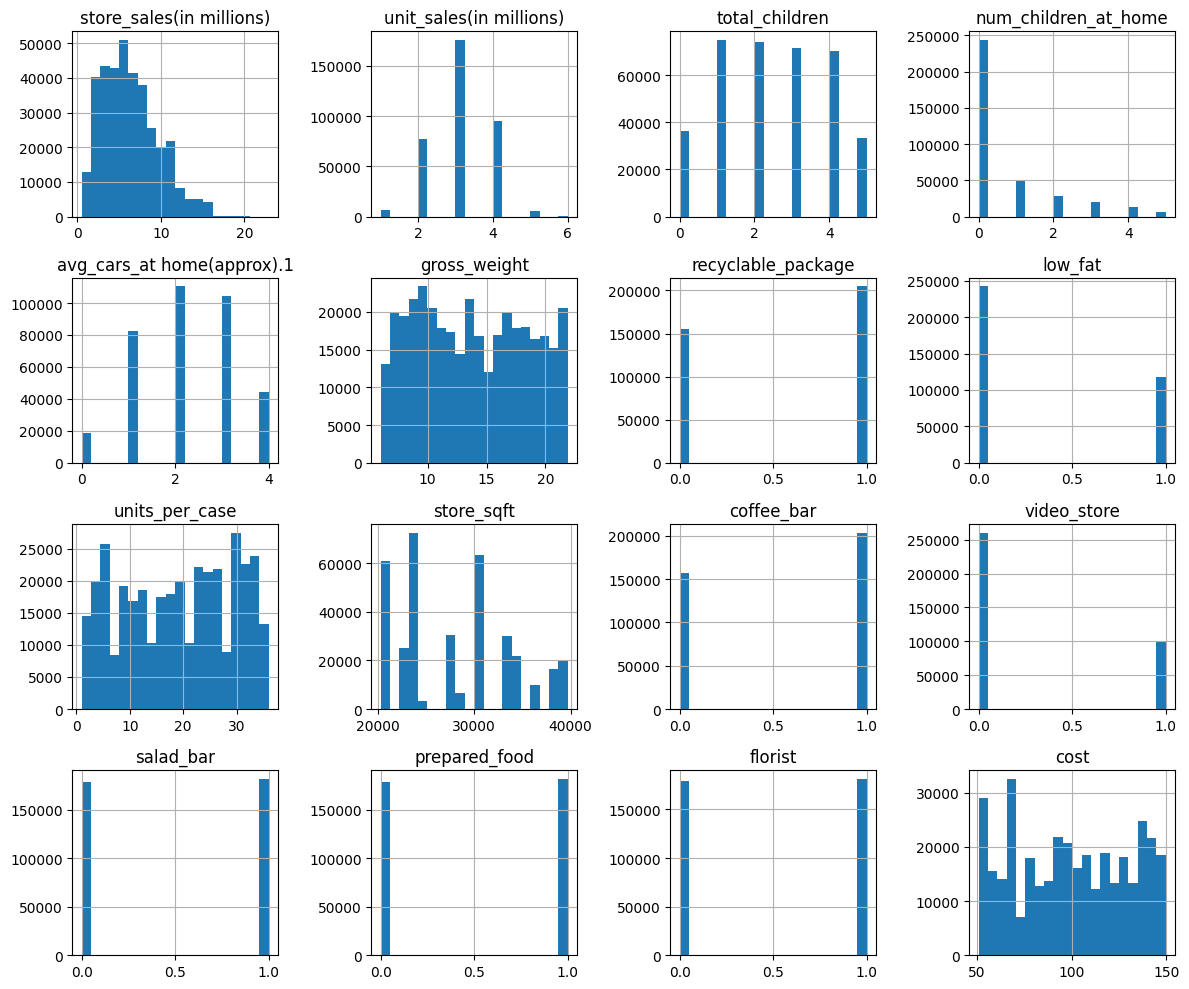

In [9]:
data = train[['store_sales(in millions)', 'unit_sales(in millions)', 'total_children', 'num_children_at_home', 'avg_cars_at home(approx).1',
              'gross_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft', 'coffee_bar',
              'video_store', 'salad_bar', 'prepared_food', 'florist', 'cost']]

data.hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

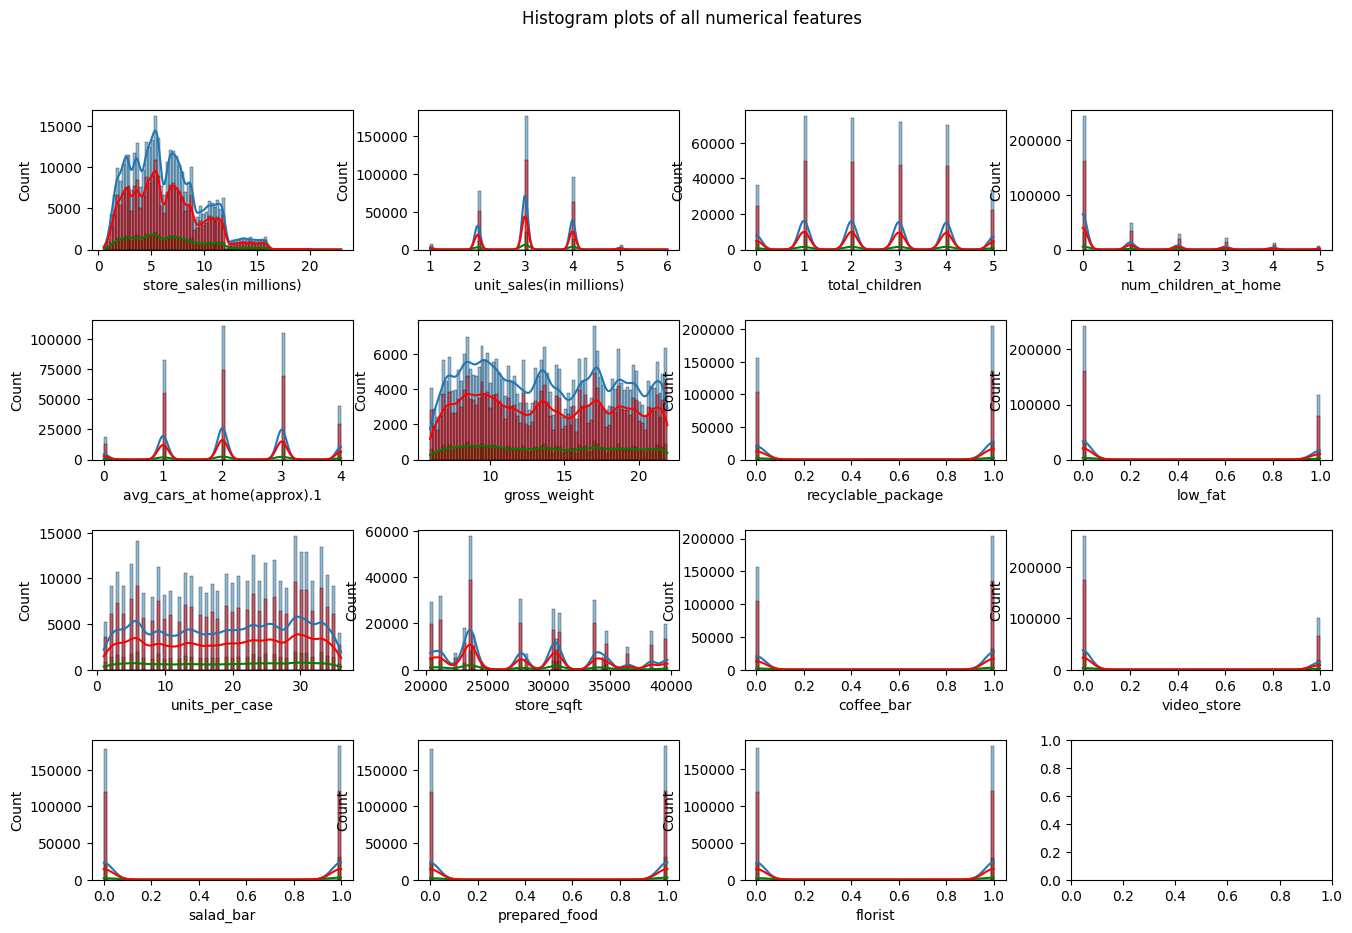

In [10]:
fig, ax = plt.subplots(4, 4, figsize=(16, 10))
for ax, col in zip(ax.flat, test.columns.to_list()):
    sns.histplot(data=train, x=col, bins=80, kde=True, ax=ax)
    sns.histplot(data=Original, x=col, bins=80, kde=True, ax=ax, color='green')
    sns.histplot(data=test, x=col, bins=80, kde=True, ax=ax, color='red')
    
fig.subplots_adjust(hspace=0.5, wspace=0.25)
fig.suptitle('Histogram plots of all numerical features');

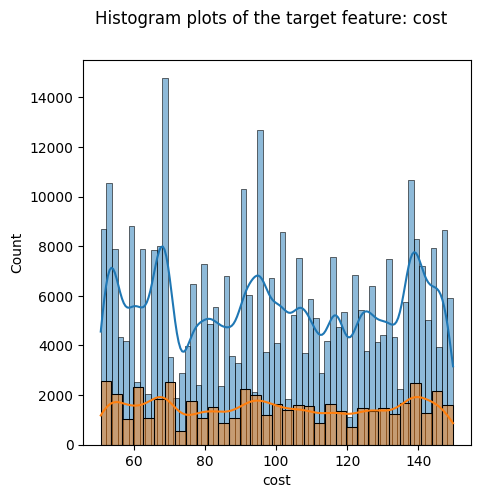

In [11]:
fig = plt.figure(figsize=(5, 5))
ax = sns.histplot(data=train, kde=True, x='cost')
ax = sns.histplot(data=Original, kde=True, x='cost')
fig.suptitle('Histogram plots of the target feature: cost');

In [12]:
Original.describe()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000
mean,6.531792,3.091194,2.538111,0.832019,2.199424,13.805512,0.558437,0.351148,18.856550,27979.153593,0.612367,0.353776,0.588011,0.588011,0.561825,99.327064
std,3.464902,0.827293,1.489316,1.303775,1.109080,4.622431,0.496578,0.477334,10.263746,5701.145280,0.487215,0.478145,0.492198,0.492198,0.496168,30.023458
min,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.800000,3.000000,1.000000,0.000000,1.000000,9.700000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000
50%,5.940000,3.000000,3.000000,0.000000,2.000000,13.600000,1.000000,0.000000,19.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000
75%,8.640000,4.000000,4.000000,1.000000,3.000000,17.700000,1.000000,1.000000,28.000000,30797.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [13]:
print(Original['store_sqft'].nunique())
#number of unique stores
test['store_sqft'].nunique()

20


20

In [14]:
Original.shape

(51363, 16)

<Axes: >

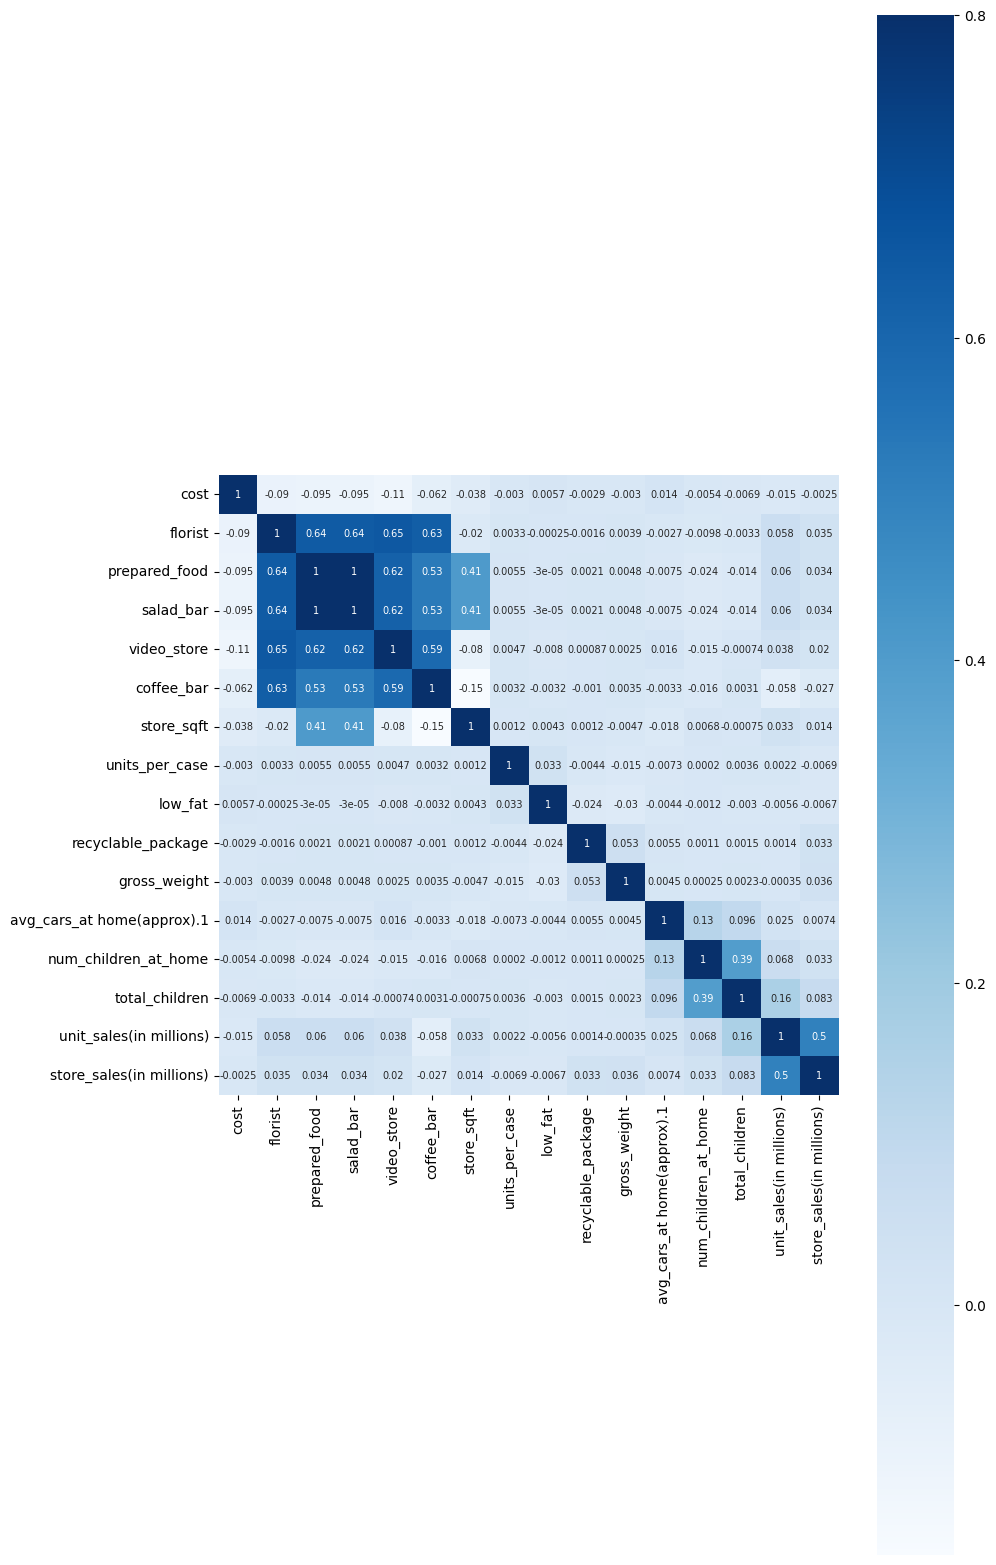

In [15]:
correlation = Original.corr()
plt.figure(figsize=(10,20))
sns.heatmap(correlation.loc[::-1,::-1], 
            square = True, 
            vmax = 0.8,
            cmap="Blues",
            annot=True,
            annot_kws={"fontsize": 7})

In [16]:
Original.shape

(51363, 16)

In [17]:
train = pd.concat([train, Original])
train.shape

(411699, 16)

In [18]:
train = train.astype({
    'store_sales(in millions)': 'float32',
    'unit_sales(in millions)': 'int8',
    'total_children': 'int8',
    'num_children_at_home': 'int8',
    'avg_cars_at home(approx).1': 'int8',
    'gross_weight': 'float32',
    'recyclable_package': 'float32',
    'low_fat': 'float32',
    'units_per_case': 'float32',
    'store_sqft': 'float64',
    'coffee_bar': 'float32',
    'video_store': 'float32',
    'salad_bar': 'float32',
    'prepared_food': 'float32',
    'florist': 'float32',
    'cost': 'float64'
})

In [19]:
train.dtypes

store_sales(in millions)      float32
unit_sales(in millions)          int8
total_children                   int8
num_children_at_home             int8
avg_cars_at home(approx).1       int8
gross_weight                  float32
recyclable_package            float32
low_fat                       float32
units_per_case                float32
store_sqft                    float64
coffee_bar                    float32
video_store                   float32
salad_bar                     float32
prepared_food                 float32
florist                       float32
cost                          float64
dtype: object

In [20]:
practice = train.copy()

In [21]:
corr_matrix = practice.corr()
corr_matrix["cost"].sort_values(ascending=False)



cost                          1.000000
avg_cars_at home(approx).1    0.025454
units_per_case               -0.000211
gross_weight                 -0.000472
low_fat                      -0.001048
recyclable_package           -0.001620
num_children_at_home         -0.002338
total_children               -0.007468
store_sales(in millions)     -0.011161
unit_sales(in millions)      -0.025002
store_sqft                   -0.047789
coffee_bar                   -0.053357
salad_bar                    -0.098418
prepared_food                -0.098447
video_store                  -0.107263
florist                      -0.107869
Name: cost, dtype: float64

In [22]:
X = train.iloc[:, :-1]
y = train.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.33)

In [23]:
y_train.shape

(275838,)

In [24]:
y_test.shape

(135861,)

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.018407922045438285

In [28]:
mean_absolute_error(y_test, y_pred)

25.647929484204216

In [29]:
mean_squared_error(y_test, y_pred,squared=False)


29.70888172379281

In [30]:
mean_squared_log_error(y_test, y_pred,squared=False)

0.31790361135098166

In [31]:
X = train.iloc[:, :-1]
y = train.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.33)

In [32]:
RFR = RandomForestRegressor()

In [33]:
RFR.fit(X_train, y_train)

RandomForestRegressor()

In [34]:
RFR_Trpredict = RFR.predict(X_train)

In [35]:
RFR_Tepredict = RFR.predict(X_test)

In [36]:
r2=r2_score(y_train, RFR_Trpredict)
print("R2 test:", r2)

R2 test: 0.8586488603140241


In [37]:
mae = mean_absolute_error(y_test, RFR_Tepredict)
print("Mean Absolute Error:",mae)

Mean Absolute Error: 24.52302645437121


In [38]:
mse = mean_squared_error(y_test, RFR_Tepredict,squared=False)
print("Mean Squared Error:",mse)

Mean Squared Error: 29.375859185021895


In [39]:
msle=mean_squared_log_error(y_test, RFR_Tepredict,squared=False)
print("Mean Squared Log Error:",msle)

Mean Squared Log Error: 0.3123269356436186


In [40]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)

In [41]:
vif_data = pd.DataFrame()
vif_data['column_name'] = train.columns
vif_data['VIF'] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]
vif_data

,column_name,VIF
0,store_sales(in millions),6.102227
1,unit_sales(in millions),18.591136
2,total_children,4.321817
3,num_children_at_home,1.549762
4,avg_cars_at home(approx).1,4.987107
5,gross_weight,8.981258
6,recyclable_package,2.294767
7,low_fat,1.487569
8,units_per_case,4.268687
9,store_sqft,21.003464


In [42]:
large_VIF_list = list(vif_data[vif_data['VIF'] > 5].column_name)
df_VIF = train.copy()
df_VIF.drop(large_VIF_list, axis=1, inplace=True)
df_VIF

,total_children,num_children_at_home,avg_cars_at home(approx).1,recyclable_package,low_fat,units_per_case,coffee_bar,video_store,florist
0,2,2,2,1.0,0.0,32.0,0.0,0.0,0.0
1,4,0,3,1.0,0.0,1.0,1.0,0.0,0.0
2,0,0,3,1.0,0.0,26.0,1.0,0.0,0.0
3,5,0,0,0.0,1.0,36.0,1.0,0.0,0.0
4,5,0,3,1.0,1.0,20.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
51358,4,4,1,1.0,1.0,18.0,1.0,0.0,1.0
51359,2,0,2,0.0,0.0,20.0,1.0,1.0,1.0
51360,3,0,3,0.0,0.0,5.0,1.0,1.0,1.0
51361,1,1,2,0.0,1.0,8.0,0.0,0.0,1.0


In [43]:
linReg = LinearRegression()
linRegr.fit(X_tain_scaled, y_train)
linPred = linReg.predict(X_test_scaled)
mean_squared_log_error(y_test,linPred,squared=False)

0.3179036113509816

In [44]:
X_train_vif = X_train_scaled[['total_children', 'num_children_at_home', 'recyclable_package', 'low_fat',
                              'units_per_case', 'coffee_bar', 'video_store', 'florist']]
X_test_vif = X_test_scaled[['total_children', 'num_children_at_home', 'recyclable_package', 'low_fat',
                            'units_per_case', 'coffee_bar', 'video_store', 'florist']]

In [45]:
linRegVIF = LinearRegression()
linRegVIF.fit(X_train_vif, y_train)
linPredVIF = linRegVIF.predict(X_test_vif)
print("Mean Absolute Error:",mean_absolute_error(y_pred=linPredVIF, y_true=y_test))
print("Mean Squared Error:",mean_squared_error(y_test, linPredVIF, squared=False))
print("Mean Squared Log Error:",mean_squared_log_error(y_test, linPredVIF, squared=False))

Mean Absolute Error: 25.799342514683516
Mean Squared Error: 29.766887321090625
Mean Squared Log Error: 0.31849053315412046


In [46]:
RanForVIF = RandomForestRegressor()
RanForVIF.fit(X_train_vif, y_train)
RanForVIFPred = RanForVIF.predict(X_test_vif)

In [47]:
print("Mean Absolute Error:",mean_absolute_error(y_pred=RanForVIFPred, y_true=y_test))
print("Mean Squared Error:",mean_squared_error(y_test, RanForVIFPred, squared=False))
print("Mean Squared Log Error:",mean_squared_log_error(y_test, RanForVIFPred, squared=False))

Mean Absolute Error: 26.103771737500818
Mean Squared Error: 30.408966806275902
Mean Squared Log Error: 0.3243168686971547


In [48]:
xgbr = xgb.XGBRegressor().fit(X_train, y_train)
xgbr_pred = xgbr.predict(X_test)
print("Mean Absolute Error:",mean_absolute_error(y_test, xgbr_pred))
print("r2:",r2_score(y_test, xgbr_pred))
print("Mean Squared Error:",mean_squared_error(y_test, xgbr_pred, squared=False))
print("Mean Squared Log Error:",mean_squared_log_error(y_test, xgbr_pred, squared=False))

Mean Absolute Error: 24.286543279619984
r2: 0.10099001606908808
Mean Squared Error: 28.43171386811154
Mean Squared Log Error: 0.3041173962923775
